COSC 6960 - Fall 2024 - Privacy Preserving Machine Learning


Sources:

https://github.com/OpenSDP/faketucky

https://colab.research.google.com/drive/1DlUlHNohxBhxN6GA5C_C4Fd9wx5AR11Y?usp=sharing

# Dataset \#1 - Use SDV's Gaussian Copula synthesizer to create a mock dataset

In [ ]:
# Install the Secure Data Vault (SDV) package
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.0/149.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
# Load packages and import Faketucky dataset
import pandas as pd
real_data = pd.read_stata("/content/drive/MyDrive/Colab Notebooks/Marquette/COSC6960 Fall 24 - PPML/faketucky.dta")

In [ ]:
# prompt: export real_data to a csv

real_data.to_csv('faketucky.csv', index=False)


In [ ]:
# Display all columns for this print only
with pd.option_context('display.max_columns', None):
    print(real_data)

           sid     sid_type first_coop_code  first_dist_code  first_hs_code  \
0           10  Fake record           GRREC              103           1110   
1         1622  Fake record           GRREC              103           1110   
2         1877  Fake record           GRREC              103           1110   
3         1941  Fake record           GRREC              103           1110   
4         2405  Fake record           GRREC              103           1110   
...        ...          ...             ...              ...            ...   
111986   94764  Fake record          Jeffco              613           9144   
111987   97538  Fake record          Jeffco              613           9144   
111988  101342  Fake record          Jeffco              613           9144   
111989  104903  Fake record          Jeffco              613           9144   
111990  105444  Fake record          Jeffco              613           9144   

       first_dist_name  first_hs_name  first_hs_alt

## 1. Create metadata for the Faketucky dataset

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

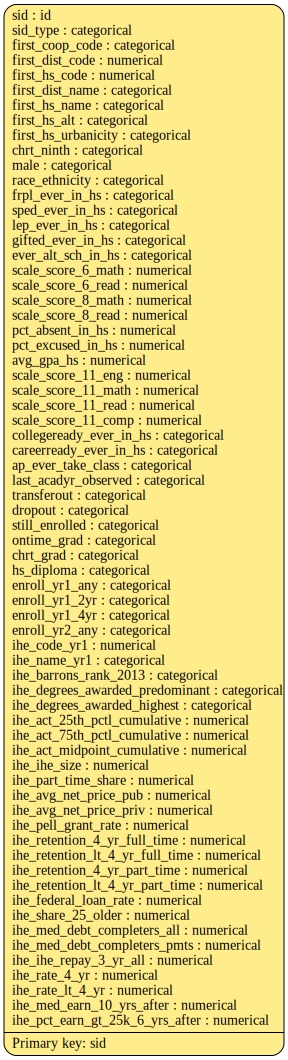

In [ ]:
metadata.visualize()

## 2. Creating a Gaussian Copula synthesizer

An SDV **synthesizer** is an object that you can use to create synthetic data. It learns patterns from the real data and replicates them to generate synthetic data.

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
# Train the synthesizer
synthesizer.fit(
    data=real_data
)

## 3. Generating synthetic data
Use the `sample` function and pass in any number of rows to synthesize.

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=111991
)

synthetic_data.head()

,sid,sid_type,first_coop_code,first_dist_code,first_hs_code,first_dist_name,first_hs_name,first_hs_alt,first_hs_urbanicity,chrt_ninth,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
0,264322880,Fake record,WKEC,424,6551,Ashmont,Acacia,1,Town: Remote,2010,...,NaN,0.4508,NaN,NaN,211.713103,NaN,0.616851,NaN,NaN,NaN
1,599467191,Fake record,OVEC,186,2980,Ascendance,Southbridge,0,Rural: Fringe,2009,...,NaN,NaN,NaN,NaN,232.780675,NaN,NaN,NaN,NaN,NaN
2,937731915,Fake record,KEDC,212,3541,Stadium,Homer,0,City: Large,2009,...,0.3693,NaN,NaN,NaN,193.261431,NaN,NaN,NaN,32493.0,0.542313
3,715371482,Fake record,Jeffco,604,9446,Snowy Hill,Adams,0,Town: Distant,2009,...,NaN,0.3773,0.3224,NaN,167.289651,0.623997,NaN,0.248147,NaN,NaN
4,498394514,Fake record,Jeffco,527,7528,Barton,Cold Springs,0,NaN,2010,...,NaN,0.6175,0.1737,NaN,277.917234,0.731175,NaN,NaN,NaN,0.580336


In [ ]:
# prompt: Export synthetic_data to a csv file

synthetic_data.to_csv('synthetic_data.csv', index=False)


## 4. Evaluating real vs. synthetic data

SDV has built-in functions for evaluating the synthetic data and getting more insight.

### 4.1 Diagnostic

As a first step, we can run a **diagnostic** to ensure that the data is valid. SDV's diagnostic performs some basic checks such as:

- All primary keys must be unique
- Continuous values must adhere to the min/max of the real data
- Discrete columns (non-PII) must have the same categories as the real data
- Etc.

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 68/68 [00:00<00:00, 169.75it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 156.15it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



<font color="green"><b>The score is 100%</b></font>, indicating that the data is fully valid.

### 4.2 Data Quality

We can also measure the **data quality** or the statistical similarity between the real and synthetic data. This value may vary anywhere from 0 to 100%.

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 68/68 [00:02<00:00, 27.88it/s]|
Column Shapes Score: 87.73%

(2/2) Evaluating Column Pair Trends: |▎         | 70/2278 [00:00<00:13, 165.34it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▍         | 100/2278 [00:01<00:46, 46.53it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▌         | 138/2278 [00:03<01:08, 31.23it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▋         | 145/2278 [00:03<01:05, 32.34it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▋         | 157/2278 [00:04<00:58, 36.30it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▋         | 169/2278 [00:04<00:51, 40.80it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▊         | 175/2278 [00:04<00:54, 38.28it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▊         | 185/2278 [00:04<00:50, 41.25it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▊         | 195/2278 [00:04<00:48, 42.78it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▉         | 200/2278 [00:05<00:53, 38.58it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▉         | 210/2278 [00:05<00:53, 38.46it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█         | 243/2278 [00:06<00:50, 40.35it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█▏        | 269/2278 [00:07<01:12, 27.86it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█▎        | 307/2278 [00:08<00:55, 35.78it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█▍        | 330/2278 [00:09<01:25, 22.67it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█▌        | 367/2278 [00:11<01:45, 18.18it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█▋        | 391/2278 [00:12<01:36, 19.65it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█▊        | 427/2278 [00:14<01:50, 16.82it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██        | 456/2278 [00:15<00:59, 30.38it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |██▏       | 493/2278 [00:16<00:38, 46.68it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▎       | 516/2278 [00:16<00:37, 46.80it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▎       | 521/2278 [00:16<00:38, 45.78it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▎       | 531/2278 [00:17<00:38, 45.04it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▎       | 541/2278 [00:17<00:38, 45.07it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▍       | 551/2278 [00:17<00:42, 40.38it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▍       | 556/2278 [00:17<00:41, 41.12it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▍       | 566/2278 [00:17<00:40, 42.35it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▋       | 608/2278 [00:18<00:33, 49.65it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▉       | 664/2278 [00:19<00:37, 43.01it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███▏      | 718/2278 [00:22<01:21, 19.20it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███▍      | 775/2278 [00:23<00:36, 40.67it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███▋      | 834/2278 [00:25<00:28, 50.09it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███▉      | 884/2278 [00:26<00:27, 50.91it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████      | 934/2278 [00:26<00:26, 50.13it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████▎     | 991/2278 [00:27<00:24, 52.18it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████▌     | 1035/2278 [00:29<00:29, 42.45it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████▊     | 1083/2278 [00:30<00:29, 41.16it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████▉     | 1133/2278 [00:31<00:29, 38.20it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████▏    | 1178/2278 [00:32<00:28, 38.77it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████▍    | 1225/2278 [00:34<00:29, 35.96it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████▌    | 1268/2278 [00:35<00:29, 33.70it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████▊    | 1313/2278 [00:37<00:28, 33.67it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█████▉    | 1359/2278 [00:38<00:26, 34.96it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▏   | 1401/2278 [00:40<00:23, 37.49it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▎   | 1440/2278 [00:41<00:22, 38.05it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▍   | 1480/2278 [00:42<00:20, 38.26it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▋   | 1522/2278 [00:43<00:17, 43.75it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▊   | 1560/2278 [00:43<00:14, 49.95it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████   | 1597/2278 [00:44<00:13, 50.87it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▏  | 1633/2278 [00:45<00:13, 49.30it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▎  | 1669/2278 [00:46<00:12, 47.04it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▍  | 1704/2278 [00:46<00:11, 48.26it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▌  | 1733/2278 [00:47<00:11, 46.40it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▊  | 1769/2278 [00:48<00:10, 47.00it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▉  | 1798/2278 [00:48<00:10, 44.43it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████  | 1830/2278 [00:49<00:09, 45.92it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▏ | 1857/2278 [00:50<00:10, 42.07it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▎ | 1882/2278 [00:50<00:09, 40.76it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▍ | 1912/2278 [00:51<00:09, 39.12it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▌ | 1937/2278 [00:52<00:08, 39.53it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▋ | 1965/2278 [00:52<00:06, 47.99it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▋ | 1979/2278 [00:52<00:06, 49.34it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▊ | 2004/2278 [00:54<00:11, 24.08it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▉ | 2029/2278 [00:55<00:09, 26.46it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▉ | 2037/2278 [00:55<00:07, 31.70it/s]|

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexer)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / le

(2/2) Evaluating Column Pair Trends: |████████▉ | 2047/2278 [00:55<00:06, 36.26it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████████ | 2056/2278 [00:55<00:05, 38.63it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█████████ | 2066/2278 [00:56<00:05, 40.37it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█████████ | 2071/2278 [00:56<00:05, 40.03it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█████████▌| 2183/2278 [00:59<00:02, 40.64it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:103: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_real, _ = correlation_fn(real_data[column1], real_data[column2])


(2/2) Evaluating Column Pair Trends: |██████████| 2278/2278 [01:01<00:00, 36.96it/s]|
Column Pair Trends Score: 83.8%

Overall Score (Average): 85.76%



## 4. Evaluate with the SDMetrics Package

Source: https://github.com/sdv-dev/SDMetrics

In [ ]:
# Convert metadata to dictionary
metadata = metadata.to_dict()

In [ ]:
#from sdmetrics import load_demo
from sdmetrics.reports.single_table import QualityReport

#real_data, synthetic_data, metadata = load_demo(modality='single_table')

my_report = QualityReport()
my_report.generate(real_data, synthetic_data, metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 68/68 [00:02<00:00, 27.01it/s]|
Column Shapes Score: 87.73%

(2/2) Evaluating Column Pair Trends: |▎         | 70/2278 [00:00<00:13, 166.20it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▍         | 100/2278 [00:01<00:47, 46.16it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▌         | 136/2278 [00:03<01:12, 29.46it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▌         | 142/2278 [00:03<01:13, 29.24it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▋         | 152/2278 [00:04<01:05, 32.22it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▋         | 163/2278 [00:04<00:56, 37.53it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▊         | 173/2278 [00:04<00:52, 40.19it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▊         | 178/2278 [00:04<00:58, 35.76it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▊         | 188/2278 [00:05<00:53, 39.18it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▊         | 198/2278 [00:05<00:48, 42.57it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |▉         | 207/2278 [00:05<00:57, 35.95it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█         | 243/2278 [00:06<00:51, 39.66it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█▏        | 268/2278 [00:07<01:10, 28.42it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█▎        | 306/2278 [00:08<00:54, 35.97it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█▍        | 329/2278 [00:09<01:28, 21.94it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█▌        | 367/2278 [00:11<01:48, 17.58it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█▋        | 391/2278 [00:12<01:54, 16.55it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█▉        | 428/2278 [00:14<01:48, 17.05it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██        | 456/2278 [00:16<00:58, 31.40it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |██▏       | 493/2278 [00:16<00:37, 47.03it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▎       | 516/2278 [00:17<00:36, 47.87it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▎       | 521/2278 [00:17<00:37, 46.70it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▎       | 531/2278 [00:17<00:37, 46.29it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▎       | 541/2278 [00:17<00:38, 44.77it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▍       | 551/2278 [00:18<00:42, 40.29it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▍       | 556/2278 [00:18<00:42, 40.78it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▍       | 566/2278 [00:18<00:41, 41.28it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▋       | 609/2278 [00:19<00:33, 49.97it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██▉       | 668/2278 [00:20<00:35, 45.30it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███▏      | 718/2278 [00:22<01:15, 20.79it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███▍      | 775/2278 [00:24<00:37, 40.05it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███▋      | 832/2278 [00:25<00:30, 47.36it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███▉      | 884/2278 [00:26<00:28, 48.76it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████      | 939/2278 [00:27<00:26, 50.20it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████▎     | 988/2278 [00:28<00:25, 51.43it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████▌     | 1034/2278 [00:29<00:29, 41.94it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████▊     | 1083/2278 [00:30<00:29, 40.07it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████▉     | 1131/2278 [00:32<00:30, 37.51it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████▏    | 1179/2278 [00:33<00:29, 37.86it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████▎    | 1223/2278 [00:34<00:29, 36.06it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████▌    | 1271/2278 [00:36<00:30, 33.09it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████▊    | 1313/2278 [00:37<00:29, 33.01it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█████▉    | 1357/2278 [00:39<00:24, 37.53it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▏   | 1397/2278 [00:40<00:25, 33.94it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▎   | 1441/2278 [00:41<00:21, 39.07it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▌   | 1482/2278 [00:42<00:20, 39.57it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▋   | 1524/2278 [00:43<00:16, 44.50it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |██████▊   | 1561/2278 [00:44<00:14, 49.27it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████   | 1598/2278 [00:45<00:13, 50.43it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▏  | 1635/2278 [00:45<00:12, 49.68it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▎  | 1666/2278 [00:46<00:12, 48.89it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▍  | 1703/2278 [00:47<00:11, 49.57it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▌  | 1732/2278 [00:47<00:11, 47.13it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▊  | 1768/2278 [00:48<00:10, 48.04it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |███████▉  | 1797/2278 [00:49<00:13, 35.66it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████  | 1826/2278 [00:50<00:10, 42.49it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▏ | 1855/2278 [00:50<00:09, 43.76it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▎ | 1885/2278 [00:51<00:09, 41.11it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▍ | 1910/2278 [00:52<00:08, 41.00it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▍ | 1935/2278 [00:52<00:08, 41.44it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▌ | 1961/2278 [00:53<00:07, 44.04it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▋ | 1982/2278 [00:53<00:07, 39.95it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▊ | 2005/2278 [00:54<00:11, 23.84it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▉ | 2030/2278 [00:55<00:08, 28.16it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |████████▉ | 2038/2278 [00:55<00:07, 32.96it/s]|

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexer)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / le

(2/2) Evaluating Column Pair Trends: |████████▉ | 2047/2278 [00:56<00:06, 36.47it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:976: RuntimeWarning: invalid value encountered in cast
  return ensure_int8(indexe

(2/2) Evaluating Column Pair Trends: |█████████ | 2057/2278 [00:56<00:05, 39.89it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█████████ | 2067/2278 [00:56<00:05, 41.83it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_real = real.groupby(list(columns), dropna=False).size() / len(real)
/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False

(2/2) Evaluating Column Pair Trends: |█████████ | 2072/2278 [00:56<00:04, 42.06it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/contingency_similarity.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_synthetic = synthetic.groupby(list(columns), dropna=False).size() / len(


(2/2) Evaluating Column Pair Trends: |█████████▌| 2185/2278 [00:59<00:02, 43.23it/s]|

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:103: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_real, _ = correlation_fn(real_data[column1], real_data[column2])


(2/2) Evaluating Column Pair Trends: |██████████| 2278/2278 [01:02<00:00, 36.45it/s]|
Column Pair Trends Score: 83.8%

Overall Score (Average): 85.76%



In [ ]:
my_report.get_visualization(property_name='Column Pair Trends')

# Creating a CTGAN synthesizer

An SDV **synthesizer** is an object that you can use to create synthetic data. It learns patterns from the real data and replicates them to generate synthetic data.

This does not work on categorical data.

In [ ]:
# from sdv.single_table import CTGANSynthesizer

# synthesizer = CTGANSynthesizer(metadata)
# synthesizer.fit(real_data)

AttributeError: 'dict' object has no attribute 'validate'

# Classification
 Create a subset from the synthetic data for students who enroll at any college or university (enroll_yr1_any).  Then perform a classification on enroll_yr2_any retention.

In [ ]:
# prompt: Create a subset of synthetic_data where enroll_yr1_any  = 1

subset_synthetic_data = synthetic_data[synthetic_data['enroll_yr1_any'] == 1]


In [ ]:
subset_synthetic_data

,sid,sid_type,first_coop_code,first_dist_code,first_hs_code,first_dist_name,first_hs_name,first_hs_alt,first_hs_urbanicity,chrt_ninth,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
3,715371482,Fake record,Jeffco,604,9446,Snowy Hill,Adams,0,Town: Distant,2009,...,NaN,0.3773,0.3224,NaN,167.289651,0.623997,NaN,0.248147,NaN,NaN
4,498394514,Fake record,Jeffco,527,7528,Barton,Cold Springs,0,NaN,2010,...,NaN,0.6175,0.1737,NaN,277.917234,0.731175,NaN,NaN,NaN,0.580336
5,405500760,Fake record,SESC,506,6875,Caspian,Humphrey,0,Rural: Distant,2009,...,NaN,NaN,NaN,24092.3,NaN,NaN,0.405821,NaN,NaN,NaN
7,117772551,Fake record,KVEC,586,9190,Snowy Hill,Eleanor,0,Suburb: Small,2010,...,NaN,0.5464,0.2358,19503.6,216.530415,0.725473,0.446269,NaN,34538.0,NaN
8,731098366,Fake record,OVEC,268,2805,Summerfield,Lindgren,0,Rural: Fringe,2009,...,NaN,NaN,NaN,NaN,208.421101,0.631644,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111967,363596149,Fake record,NKCES,562,7932,Foster,Davidson,0,City: Large,2009,...,NaN,NaN,0.2335,19085.6,NaN,NaN,NaN,NaN,34149.0,0.590797
111972,483296375,Fake record,KVEC,527,8170,Adolphus,Cilian,0,Town: Remote,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.452447
111978,613778207,Fake record,NKCES,314,5507,Elmwood,Graham,0,Town: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34955.0,0.611423
111980,44552044,Fake record,KEDC,392,4913,Lark Valley,Wellington,0,Suburb: Large,2009,...,NaN,0.4605,NaN,NaN,222.791918,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: Remove NaN from subset_synthetic_data

#subset_synthetic_data = subset_synthetic_data.dropna()


In [ ]:
# prompt: Drop sid_type from subset_synthetic_data

subset_synthetic_data = subset_synthetic_data.drop('sid_type', axis=1)


In [ ]:
# prompt: show all rows for enroll_yr2_any.  how many are NaN.  how many have 0.0 or 1.0

print(subset_synthetic_data['enroll_yr2_any'])
print("NaN values:", subset_synthetic_data['enroll_yr2_any'].isna().sum())
print("0.0 values:", (subset_synthetic_data['enroll_yr2_any'] == 0.0).sum())
print("1.0 values:", (subset_synthetic_data['enroll_yr2_any'] == 1.0).sum())


3         NaN
4         1.0
5         0.0
7         NaN
8         1.0
         ... 
111967    0.0
111972    0.0
111978    0.0
111980    0.0
111990    1.0
Name: enroll_yr2_any, Length: 44618, dtype: float64
NaN values: 12398
0.0 values: 21819
1.0 values: 10401


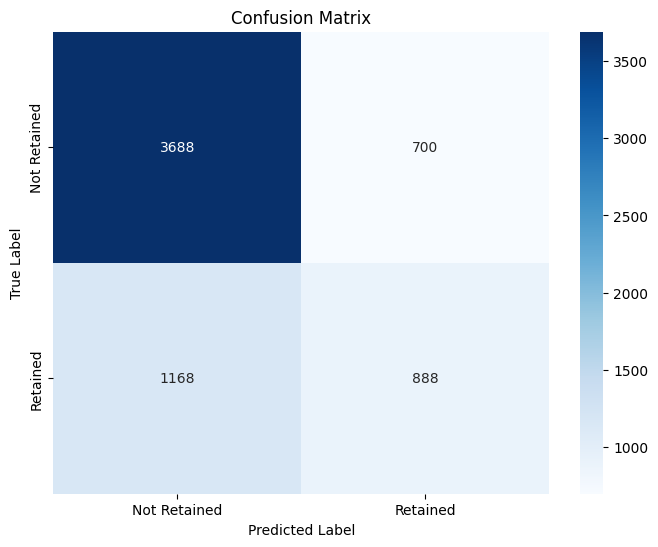

In [ ]:
# Split the data into features (X) and target variable (y)
X = subset_synthetic_data.drop('enroll_yr2_any', axis=1)
y = subset_synthetic_data['enroll_yr2_any']

# Drop rows with NaN values in the target variable from the original dataframe
subset_synthetic_data = subset_synthetic_data.dropna(subset=['enroll_yr2_any'])

# Now recreate X and y from the subset_synthetic_data with dropped NaN
X = subset_synthetic_data.drop('enroll_yr2_any', axis=1)
y = subset_synthetic_data['enroll_yr2_any']

# Convert object columns to categorical
# This ensures XGBoost can recognize and handle them correctly
for col in X.select_dtypes(include=['object']):
    X[col] = X[col].astype('category')

#Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

#Import XGBClassifier
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
model = XGBClassifier(enable_categorical=True) # Set enable_categorical to True

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Import matplotlib.pyplot
import matplotlib.pyplot as plt #Added this line to import matplotlib.pyplot
import seaborn as sns # Make sure to import seaborn as well

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Retained', 'Retained'],
            yticklabels=['Not Retained', 'Retained'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

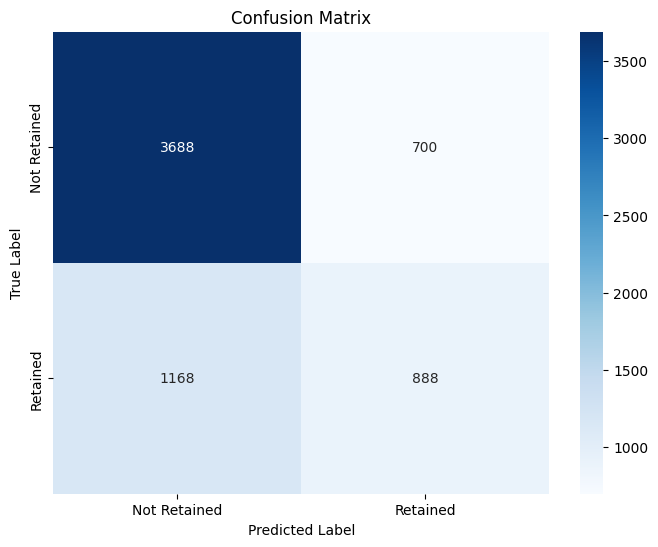

In [ ]:
# Split the data into features (X) and target variable (y)
X = subset_synthetic_data.drop('enroll_yr2_any', axis=1)
y = subset_synthetic_data['enroll_yr2_any']

# Drop rows with NaN values in the target variable from the original dataframe
subset_synthetic_data = subset_synthetic_data.dropna(subset=['enroll_yr2_any'])

# Now recreate X and y from the subset_synthetic_data with dropped NaN
X = subset_synthetic_data.drop('enroll_yr2_any', axis=1)
y = subset_synthetic_data['enroll_yr2_any']

# Convert object columns to categorical
# This ensures XGBoost can recognize and handle them correctly
for col in X.select_dtypes(include=['object']):
    X[col] = X[col].astype('category')

#Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(enable_categorical=True) # Set enable_categorical to True

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Retained', 'Retained'],
            yticklabels=['Not Retained', 'Retained'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# prompt: Provide accuracy, F1, precision, and recall from the binary prediction

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")


Accuracy: 0.7101179391682185
F1-score: 0.48737650933040616
Precision: 0.5591939546599496
Recall: 0.43190661478599224


2         0.0
3         1.0
7         0.0
8         0.0
9         1.0
         ... 
111948    0.0
111964    0.0
111966    1.0
111984    0.0
111985    1.0
Name: enroll_yr2_any, Length: 44442, dtype: float64
NaN values: 0
0.0 values: 27753
1.0 values: 16689


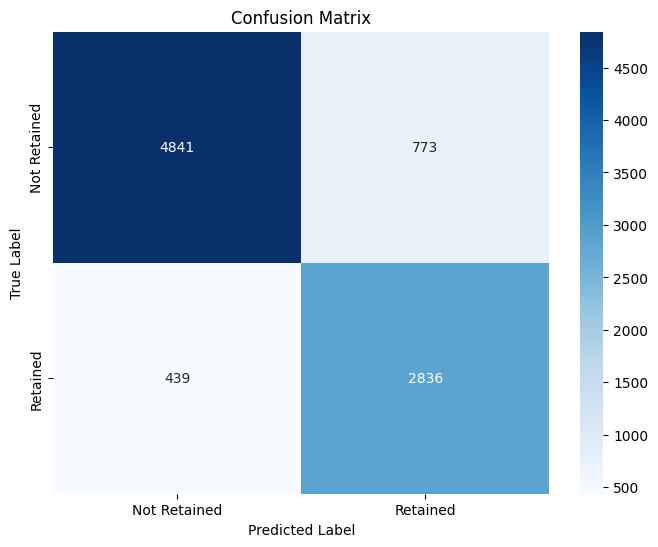

Accuracy: 0.8636517043536955
F1-score: 0.8239395700174317
Precision: 0.7858132446661125
Recall: 0.8659541984732825


In [ ]:
# prompt: Run the same binary prediction on the real_data and provide the same charts and accuracy information

# Create a subset from the real data for students who attended a 4 year university.  Then perform a classification on ihe_retention_4_yr_full_time.

subset_real_data = real_data[real_data['enroll_yr1_any'] == 1]

#subset_real_data = subset_real_data.dropna()


subset_real_data = subset_real_data.drop('sid_type', axis=1)


print(subset_real_data['enroll_yr2_any'])
print("NaN values:", subset_real_data['enroll_yr2_any'].isna().sum())
print("0.0 values:", (subset_real_data['enroll_yr2_any'] == 0.0).sum())
print("1.0 values:", (subset_real_data['enroll_yr2_any'] == 1.0).sum())

# Split the data into features (X) and target variable (y)
X = subset_real_data.drop('enroll_yr2_any', axis=1)
y = subset_real_data['enroll_yr2_any']

# Drop rows with NaN values in the target variable from the original dataframe
subset_real_data = subset_real_data.dropna(subset=['enroll_yr2_any'])

# Now recreate X and y from the subset_real_data with dropped NaN
X = subset_real_data.drop('enroll_yr2_any', axis=1)
y = subset_real_data['enroll_yr2_any']

# Convert object columns to categorical
# This ensures XGBoost can recognize and handle them correctly
for col in X.select_dtypes(include=['object']):
    X[col] = X[col].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(enable_categorical=True) # Set enable_categorical to True

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Retained', 'Retained'],
            yticklabels=['Not Retained', 'Retained'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")


In [ ]:
# prompt: Count of value = 1 in the enroll_yr2_any for the real_data dataset

count_ones = (real_data['enroll_yr2_any'] == 1).sum()
print(f"Count of value 1 in enroll_yr2_any: {count_ones}")


Count of value 1 in enroll_yr2_any: 18776


# Dataset #2 - Add differential privacy to Faketucky dataset

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype, is_categorical_dtype

def add_dp_noise_numeric(series, epsilon):
    """
    Adds Laplace noise to a numeric pandas Series to achieve differential privacy.
    """
    sensitivity = series.max() - series.min()
    scale = sensitivity / epsilon
    noisy_series = series + np.random.laplace(0, scale, size=series.shape)
    return noisy_series

def perturb_categorical(series, epsilon):
    """
    Applies differential privacy to a categorical pandas Series using the exponential mechanism.
    """
    categories = series.cat.categories if hasattr(series, 'cat') else series.unique()
    num_categories = len(categories)
    probabilities = np.full(num_categories, np.exp(epsilon))
    probabilities /= probabilities.sum()
    noisy_series = series.copy()

    for idx in series.index:
        if np.random.rand() > (np.exp(epsilon) / (np.exp(epsilon) + num_categories - 1)):
            noisy_category = np.random.choice(categories, p=probabilities)
            noisy_series.loc[idx] = noisy_category
    return noisy_series

def create_dp_data(real_data, epsilon=1.0):
    """
    Creates a differentially private version of the input DataFrame.
    """
    dp_data = pd.DataFrame(index=real_data.index)

    for col in real_data.columns:
        if is_numeric_dtype(real_data[col]):
            dp_data[col] = add_dp_noise_numeric(real_data[col], epsilon)
        elif is_categorical_dtype(real_data[col]):
            dp_data[col] = perturb_categorical(real_data[col], epsilon)
        else:
            # Handle other data types if necessary
            dp_data[col] = real_data[col]
    return dp_data

# Example usage:
# dp_data = create_dp_data(real_data, epsilon=1.0)



In [ ]:
# Create dataset with differential privacy
dp_data = create_dp_data(real_data, epsilon=1.0)

<ipython-input-27-90aab8bdb6c9>:39: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

<ipython-input-27-90aab8bdb6c9>:39: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

<ipython-input-27-90aab8bdb6c9>:39: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

<ipython-input-27-90aab8bdb6c9>:39: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

<ipython-input-27-90aab8bdb6c9>:39: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

<ipython-input-27-90aab8bdb6c9>:39: DeprecationWarning:

is_categorical_dty

In [ ]:
dp_data

,sid,sid_type,first_coop_code,first_dist_code,first_hs_code,first_dist_name,first_hs_name,first_hs_alt,first_hs_urbanicity,chrt_ninth,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
0,104760.658573,Fake record,KEDC,559.385204,10919.129474,Jackson,Jackson,-0.169381,Rural: Distant,2010.766188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,216915.415324,Fake record,Jeffco,395.008516,-1173.460733,Jackson,Jackson,1.100943,Town: Remote,2004.540480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,156074.771576,Fake record,KEDC,-52.775955,-18811.862760,Jackson,Jackson,0.069047,City: Small,2006.252276,...,-0.383506,0.504917,0.648647,14738.361323,503.337122,0.597982,NaN,0.728747,36430.578371,0.031946
3,-39788.493161,Fake record,CKEC,-84.353192,5769.928075,Jackson,Jackson,5.082919,Rural: Distant,2008.009976,...,-0.084519,-0.421977,-0.385404,-11830.962564,-296.597871,0.494838,NaN,0.267650,-720.003495,-1.403100
4,-243858.064335,Fake record,SESC,-198.044594,1973.099197,Jackson,Jackson,-0.729788,City: Large,2010.414432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111986,205566.808939,Fake record,SESC,438.103396,12935.042386,Lookout Point,Lookout Point,-0.065025,Rural: Remote,2011.422674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111987,163271.190460,Fake record,Jeffco,422.841085,2640.406215,Lookout Point,Lookout Point,0.951807,Suburb: Mid-size,2007.172079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111988,193705.337794,Fake record,OVEC,751.982598,22551.511831,Lookout Point,Lookout Point,0.838432,Town: Distant,2006.207946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111989,449614.210949,Fake record,Jeffco,1489.088078,19275.504187,Lookout Point,Lookout Point,0.998398,Town: Fringe,2009.113016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Evaluate with the SDV data vs DP data

In [ ]:
# from sdmetrics.reports.single_table import QualityReport

# # Initialize and generate a report comparing the datasets
# synthetic_report = QualityReport()
# synthetic_report.generate(real_data, synthetic_data, metadata)

In [ ]:
from sdmetrics.visualization import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='avg_gpa_hs',
    plot_type='distplot'
)

fig.show()


# Dataset \#3 - Use SDV to create a differentially private dataset.

In [ ]:
## SDV has updated the package so it no longer appears to have the PrivBayes option

# from sdv.tabular.BaseTabularModel import PrivBayes

# model = PrivBayes(epsilon=1.0)
# model.fit(real_data)
# dp_synthetic_data = model.sample()


#Dataset #4 - Use SDV with TVAE
Recommended in Kiran, A., and S. Saravana Kumar. 2024. “A Methodology and an Empirical Analysis to Determine the Most Suitable Synthetic Data Generator.” IEEE Access: Practical Innovations, Open Solutions 12: 12209–28.

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10400420

SDV documentation - https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/tvaesynthesizer

In [ ]:
from sdv.metadata import SingleTableMetadata

# Assuming your metadata is in a dictionary called 'metadata_dict'
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)


In [ ]:
columns_to_cast = [
    'first_coop_code',
    'first_hs_urbanicity',
    'ihe_degrees_awarded_predominant',
    'ihe_degrees_awarded_highest'
]


In [ ]:
real_data[columns_to_cast] = real_data[columns_to_cast].astype('object')


In [ ]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(real_data)

In [ ]:
tvae_synthetic_data = synthesizer.sample(num_rows=111991)


In [ ]:
tvae_synthetic_data.to_csv('tvae_synthetic_data.csv', index=False)

# SDV documentation on Custom Processing and Anonymization
https://colab.research.google.com/drive/1Z9Rff5G3eDI-LEc1LXiew9E3hF5Ob-on?usp=sharing#scrollTo=ZZB_FFt7PbCN